<a href="https://colab.research.google.com/github/ueche/ml-class/blob/main/projects/Ulysses_Echeverria_Notes_Crate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

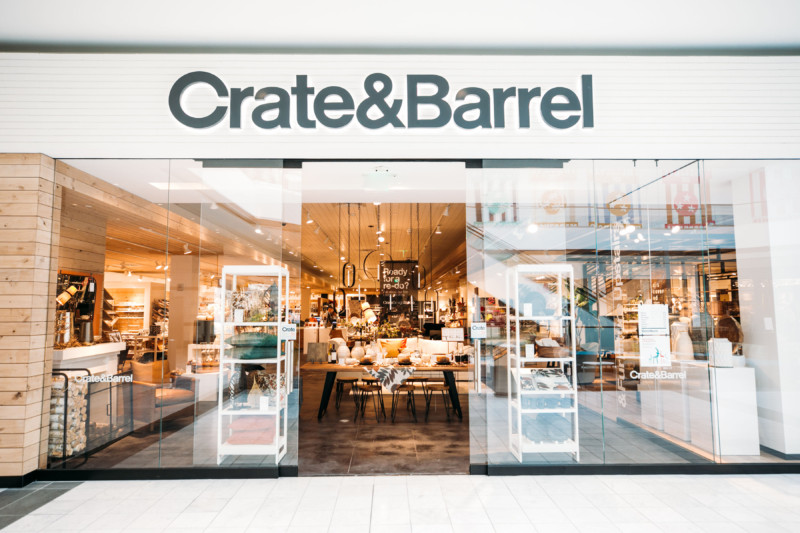

# **The Crate and Barrel Project** 

The dataset has 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories.

Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

There are nine categories for all products. Each target category represents one of our most important product categories (like fashion, electronics, etc.). The products for the training and testing sets are selected randomly.

### **File descriptions**
trainData.csv - the training set
testData.csv - the test set
sampleSubmission.csv - a sample submission file in the correct format

### **Data fields**
id - an anonymous id unique to a product
feat_1, feat_2, ..., feat_93 - the various features of a product
target - the class of a product

**The data:**

sampleSubmission.csv :   

test.csv :  

train.csv :




https://www.kaggle.com/competitions/otto-group-product-classification-challenge/overview

### **1.  Download the data to the Google Colab environment**

In [ ]:
# I'm exited about showing off this step because I learned how touse the 
# Kaggle API to download the data directly into the Google Colab environment. 
# Not knowing how to download the data in an easy reusable method was keeping 
# me from working on the myriad of practice examples that Kaggle offers.
# I will be learning a lot this summer from Kaggle and updating projects into 
# my Github.

# Install the Kaggle API to download data
# pip install Kaggle

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# then create an API token on Kaggle website using your Kaggle account
# https://www.kaggle.com/<username>/account
# then upload the 'kaggle.json' file to the google colab environment
from google.colab import files

uploaded = files.upload()

# Make sure kaggle.json is in the location ~/.kaggle/kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset using the Kaggle API
!kaggle competitions download -c otto-group-product-classification-challenge


  0% 0.00/6.05M [00:00<?, ?B/s]
100% 6.05M/6.05M [00:00<00:00, 87.4MB/s]


In [ ]:
# unzip the file
!unzip otto-group-product-classification-challenge.zip

Archive:  otto-group-product-classification-challenge.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### **Load the data using pandas**

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

sample_data = pd.read_csv('sampleSubmission.csv') 
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#training_data.describe()
data


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [ ]:
# the data we will use to test our model is provided by Kaggle without the target column
# this way the model's succress will be evaluated by kaggle upon submission

test

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,144364,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
144364,144365,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [ ]:
# Check for missing data
print(data.isnull().sum())

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64


In [ ]:
print(test.isnull().sum())

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
Length: 94, dtype: int64


In [ ]:
# Separate the data features columns from the label columns

data_features = data.drop('target', axis=1)
data_labels = data['target']
data_features


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,22,0,1,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61874,61875,4,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61875,61876,0,0,0,0,0,0,0,3,1,...,0,0,3,1,0,0,0,0,0,0
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,10,0


In [ ]:
data_labels

0        Class_1
1        Class_1
2        Class_1
3        Class_1
4        Class_1
          ...   
61873    Class_9
61874    Class_9
61875    Class_9
61876    Class_9
61877    Class_9
Name: target, Length: 61878, dtype: object

In [ ]:
# the model I chose is XGBoost which require the values to be integers

# so we have to transform the labels to integers before we can fit the data 
# into the model by using sklearn's LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_labels = le.fit_transform(data_labels)

# the result is an array of integers 0-8 representing each of the 9 product categories ie. labels
data_labels

array([0, 0, 0, ..., 8, 8, 8])

In [ ]:
# see the quantity of unique labels
from pandas.tseries.frequencies import unique

len(np.unique(data_labels))

9

### Split the data into the training and testind datasets to be used for training and testing the model.

In [ ]:
# split the data using sklearn

from sklearn.model_selection import train_test_split

#Split the data into 4 datasets, training features and labels, and features and labels for testing 
train_data_features, test_data_features, train_data_labels, test_data_labels = train_test_split(data_features, data_labels, test_size=0.2, random_state=42)


In [ ]:
#Lets normalize the data after the first results to see if there is an impovement in accuracy

# Normalize the data using sklearn
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# std_train_data_features = scaler.fit_transform(train_data_features)
# std_test_data_features = scaler.transform(test_data_features)


### Now that we are done with pre-processing, the datat is ready to be fit into the model for training.

The model I chose for this exercise is XGBost. I chose it from all the others beause it is the most powerful from my limited experience so far, beause of gradient boosting takes multiple weak classifiers and unifies them into a strong model. It also does this very efficiently using parallel processing.

In [ ]:
# fit the data into the model
import xgboost as xgb


params = {'n_estimators': 100, 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = xgb.XGBClassifier(**params)

model.fit(train_data_features, train_data_labels)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor='gpu_predictor', ...)

Once the model is trained, you can evaluate the accuracy using using the the test_labels and comparing them to the models prediction results. 

In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_data_features)
accuracy_score(test_data_labels, predictions)

0.9978183581124758

In [ ]:
# Evaluate the model by using sklearn.metrics

from sklearn.metrics import classification_report, accuracy_score

prediction = model.predict(test_data_features)
print("Accuracy:", accuracy_score(test_data_labels, prediction))
print("\nClassification report:\n", classification_report(test_data_labels, prediction))

Accuracy: 0.9978183581124758

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00      3178
           2       1.00      0.99      1.00      1561
           3       0.99      1.00      0.99       538
           4       1.00      1.00      1.00       565
           5       1.00      1.00      1.00      2884
           6       0.99      0.99      0.99       552
           7       1.00      1.00      1.00      1674
           8       1.00      1.00      1.00      1025

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376



Now lets go back if we can improve the accuracy by normalizing the data.

In [ ]:
# Normalize the data using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_train_data_features = scaler.fit_transform(train_data_features)
std_test_data_features = scaler.transform(test_data_features)


In [ ]:
# fit the data into the model
import xgboost as xgb

params = {'n_estimators': 100, 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor'}
model = xgb.XGBClassifier(**params)

model.fit(std_train_data_features, train_data_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor='gpu_predictor', ...)

In [ ]:
# Evaluate the model by using sklearn.metrics

from sklearn.metrics import classification_report, accuracy_score

prediction = model.predict(std_test_data_features)
print("Accuracy:", accuracy_score(test_data_labels, prediction))
print("\nClassification report:\n", classification_report(test_data_labels, prediction))

Accuracy: 0.9978183581124758

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00      3178
           2       1.00      0.99      1.00      1561
           3       0.99      1.00      0.99       538
           4       1.00      1.00      1.00       565
           5       1.00      1.00      1.00      2884
           6       0.99      0.99      0.99       552
           7       1.00      1.00      1.00      1674
           8       1.00      1.00      1.00      1025

    accuracy                           1.00     12376
   macro avg       1.00      1.00      1.00     12376
weighted avg       1.00      1.00      1.00     12376



No improvement there but I also dont think I can improve much on a 99.78% accuracy.




I'm curious to see how a logistig regression model would work with this dataset.

In [ ]:
# creat a logistic regression model using sklearn

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(std_train_data_features, train_data_labels)

print("Accuracy:", accuracy_score(test_data_labels, prediction))
#print("\nClassification report:\n", classification_report(test_data_labels, prediction))

Accuracy: 0.9729314802844214


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The XGBoost model does better as expected.

In [ ]:
# creat a logistic regression model using sklearn

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model - increased the number of iterations as the warning suggested
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
model.fit(std_train_data_features, train_data_labels)

print("Accuracy:", accuracy_score(test_data_labels, prediction))
#print("\nClassification report:\n", classification_report(test_data_labels, prediction))

Accuracy: 0.9729314802844214


I still end up pwith the same accuracy score, but no warnig.